<a href="https://colab.research.google.com/github/omarcevi/ML-Projects/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tf.random.set_seed(42)
tf.keras.backend.clear_session()


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_train.dtype)

(55000, 28, 28)
uint8


In [5]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [16]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover","Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print(class_names[y_train[0]])

Ankle boot


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='sgd',
    metrics=['accuracy']
)

In [25]:
history  = model.fit(X_train, y_train,
                     epochs=30,
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7095 - accuracy: 0.7625 - val_loss: 0.5119 - val_accuracy: 0.8232
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4861 - accuracy: 0.8301 - val_loss: 0.4653 - val_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4400 - accuracy: 0.8455 - val_loss: 0.4294 - val_accuracy: 0.8482
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4150 - accuracy: 0.8547 - val_loss: 0.3957 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3937 - accuracy: 0.8615 - val_loss: 0.3913 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3772 - accuracy: 0.8671 - val_loss: 0.3946 - val_accuracy: 0.8628
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3650 - accuracy: 0.8699 - val_loss: 0.3728 - val_accura

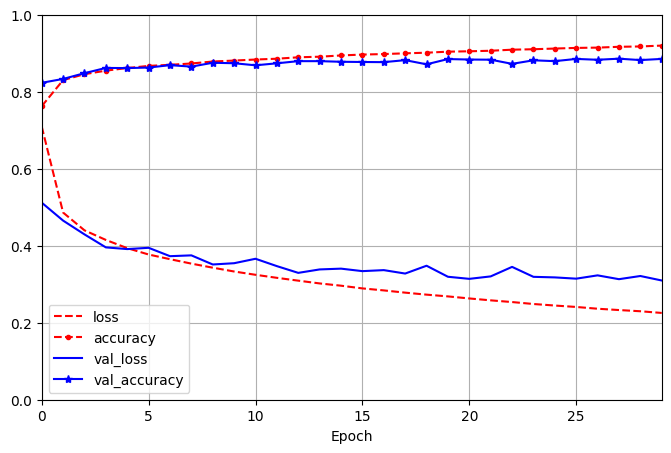

In [27]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
    )
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3253 - accuracy: 0.8870


[0.32529762387275696, 0.8870000243186951]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 99ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
y_pred = y_proba.argmax(axis=-1)
print(np.array(class_names)[y_pred])

['Ankle boot' 'Pullover' 'Trouser']
